In [1]:
#!/usr/bin/python
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

sns.set_style("ticks")


In [38]:
#import latest simulation data
#df=pd.read_csv('grid_search.csv')
df=pd.read_csv('grid_full_mean2020-11-29.csv')

df.columns = df.columns.str.replace('additivity', 'add')
df.columns = df.columns.str.replace('Neut', '')
df.columns = df.columns.str.replace('_mean', '')
df.columns = df.columns.str.replace('coverage', 'f')

#sensitivity variables
varz=['c0', 'ratio', 'hl_1', 'hl_2', 'omega_1', 'omega_2', 'muIC50_1',
       'muIC50_2', 'sigIC50_1', 'sigIC50_2']


In [39]:
#change to fraction resistant
df['omega_1']=1-df['omega_1']
df['omega_2']=1-df['omega_2']

In [40]:
df = df[(df['muIC50_1']>-3) & (df['muIC50_2']>-3)]

In [41]:
#restrict to lower doses
df = df[df['c0']<2000]

In [42]:
df.shape

(142560, 121)

In [43]:
#lists of types

combo_model = ['min','BH','add']

endpoint = ['ID50','iip','ID50log10','neut',
                'ID50_f1','ID50_f10','ID50_f100','ID50_f1000','ID50_f1e4',
                'iip_f1','iip_f2','iip_f3','iip_f4',]

#pick thresholds of 100 and iip=2
endpoint_less = ['ID50','iip','ID50log10','neut','ID50_f100','iip_f2']

when = ['auc','trough']

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


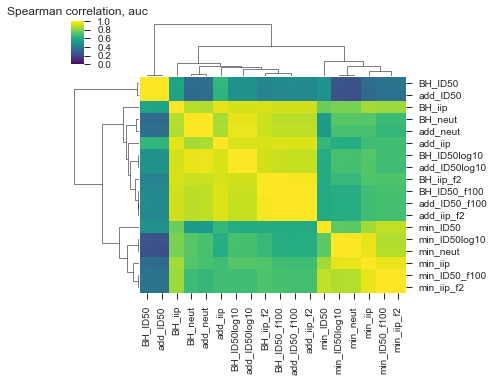

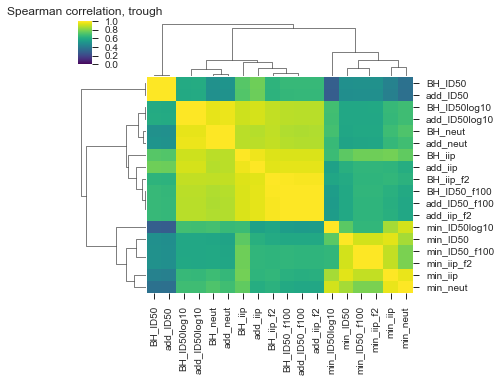

In [50]:
#get better list of outcome names

for w in when:
    outz=[]
    for cm in combo_model:
        for m in endpoint_less:
            outz.append(cm+'_'+m+'_'+w)
    
    tdf=df[outz]
    tdf.columns = tdf.columns.str.replace('_'+w, '') #remove the trough name from the column

    outcome_corr_mat=tdf.corr(method="spearman")

    g=sns.clustermap(outcome_corr_mat, annot=False, vmin=0,vmax=1,cmap='viridis', figsize=(6,5))
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis

    plt.title('Spearman correlation, '+w)
    plt.savefig('../figures/cluster_w_'+w+'3.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0.8474785522449717 0.5027981349424856 0.9999773811754679 0.027247569936935917


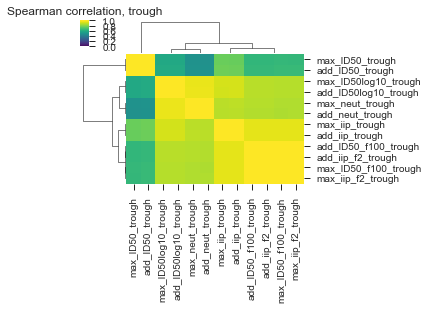

In [52]:
outzmaxadd= ['max_ID50_'+w,
 'max_iip_'+w,
 'max_ID50log10_'+w,
 'max_neut_'+w,
 'max_ID50_f100_'+w,
 'max_iip_f2_'+w,
 'add_ID50_'+w,
 'add_iip_'+w,
 'add_ID50log10_'+w,
 'add_neut_'+w,
 'add_ID50_f100_'+w,
 'add_iip_f2_'+w]


tdf=df[outzmaxadd]
outcome_corr_mat=tdf.corr(method="spearman")

g=sns.clustermap(outcome_corr_mat, annot=False, vmin=0,vmax=1,cmap='viridis', figsize=(4,3))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis

plt.title('Spearman correlation, '+w)
plt.savefig('../figures/cluster_maxadd_'+w+'.pdf',dpi=600)


print(np.mean(np.mean(outcome_corr_mat[outcome_corr_mat<1],1)),
        np.min(np.min(outcome_corr_mat[outcome_corr_mat<1],1)),
        np.max(np.max(outcome_corr_mat[outcome_corr_mat<1],1)),
        np.std(np.std(outcome_corr_mat[outcome_corr_mat<1],1))
     )

In [11]:
#sns.pairplot(tdf)

In [53]:
#the reordered outputs for trough clustering
clustered_outz = np.array(outz)[g.dendrogram_col.reordered_ind]

clustered_outz

array(['min_ID50_trough', 'BH_ID50_trough', 'min_ID50log10_trough',
       'BH_ID50log10_trough', 'min_neut_trough', 'BH_neut_trough',
       'min_iip_trough', 'BH_iip_trough', 'BH_ID50_f100_trough',
       'BH_iip_f2_trough', 'min_ID50_f100_trough', 'min_iip_f2_trough'],
      dtype='<U20')

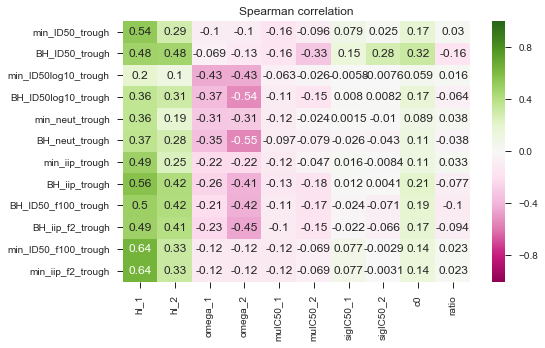

In [54]:
#plot sensitivity correlations against all variables with clustered labels

varz = [
    'hl_1',
    'hl_2',
    'omega_1',
    'omega_2',
    'muIC50_1',
    'muIC50_2',
    'sigIC50_1',
    'sigIC50_2',
    'c0',
    'ratio']

tdf=df[list(clustered_outz)+varz]

outvar_corr_mat=tdf.corr(method="spearman")

plt.figure(figsize=(8,5))
#sns.heatmap(outvar_corr_mat, annot=False, vmin=-1,vmax=1,cmap='PiYG')
sns.heatmap(outvar_corr_mat.loc[list(clustered_outz),varz], annot=True, vmin=-1,vmax=1,cmap='PiYG')
plt.title('Spearman correlation')

#plt.yticks()
plt.tight_layout()
plt.savefig('../figures/corrmat_outcome_clustersorted_sensitivity4.pdf',dpi=600)


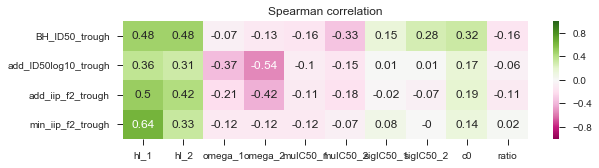

In [62]:
#correlate with variables -- broken into 5 main categories with representatives

final_outz = ['BH_ID50_'+w,'add_ID50log10_'+w,'add_iip_f2_'+w,'min_iip_f2_'+w]

tdf=df[final_outz+varz]

outvar_corr_mat=tdf.corr(method="spearman").round(2)

plt.figure(figsize=(9,2.5))
#sns.heatmap(outvar_corr_mat, annot=False, vmin=-1,vmax=1,cmap='PiYG')
sns.heatmap(outvar_corr_mat.loc[final_outz,varz], annot=True, vmin=-1,vmax=1,cmap='PiYG')
plt.title('Spearman correlation')
plt.tight_layout()
plt.savefig('../figures/corrmat_outcome_categories_sensitivity4.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater_equal
/Applications/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Applications/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Applications/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Applications/anaconda/lib/python3.6/site-packages/numpy/core

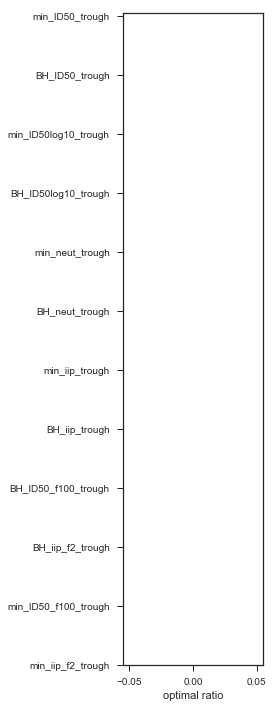

In [67]:
#look at the distribution of optimal ratio across all parameters

optr_avg=[]
optr_std=[]
outz=[]
top95_l=[]
plt.figure(figsize=(4,10))
ii=0
for osl in list(clustered_outz):
    sorted_r = np.array(df['ratio'][np.argsort(-df[osl])])
    sorted_c = np.array(df[osl][np.argsort(-df[osl])])

    top95 = sorted_c[sorted_c>=(0.95*sorted_c[0])] #more than 95% of max

    optr_avg.append(np.mean(sorted_r[:len(top95)]))
    optr_std.append(np.std(sorted_r[:len(top95)]))

    top95_l.append(len(top95))

    #plot if not empty
    if list(sorted_r[:len(top95)]):
        plt.violinplot(sorted_r[:len(top95)],positions=[-ii],vert=False,showextrema=False,showmedians=True)

    ii+=1
#plt.errorbar(optr_avg,np.arange(len(optr)),xerr=optr_std)#,vert=False,showextrema=False,showmedians=True)

plt.xlabel('optimal ratio')
plt.yticks(-np.arange(len(clustered_outz)),clustered_outz)#,rotation=90)
plt.tight_layout()
plt.savefig('../figures/optr_violins4.pdf',dpi=600)


In [68]:
top95

array([0.   , 0.344, 0.034, ..., 0.   , 0.   , 0.   ])

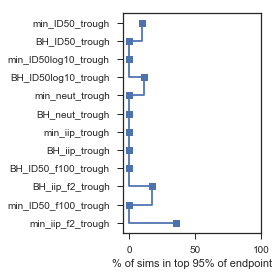

In [64]:
#% of simulation within maximum value

plt.figure(figsize=(4,4))
plt.step(np.array(top95_l)/len(df)*100,-np.arange(len(top95_l)),marker='s')
#plt.semilogx()
plt.xlabel('% of sims in top 95% of endpoint')
plt.yticks(-np.arange(len(clustered_outz)),clustered_outz)#,rotation=90)
#plt.xticks(,rotation=90)
plt.xlim([-5,100])
plt.tight_layout()
plt.savefig('../figures/optr_fracintop95_4.pdf',dpi=600)



In [69]:
sorted_c

array([ 0., nan, nan, ...,  0.,  0., nan])